In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
import tensorflow as tf

Using TensorFlow backend.
C:\Users\KIIT\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cross Entropy Method

* Evolutionary Algorithm.
* Using it to solve CartPole problem


### Gym interface for CartPole Problem

main methods of an environment are
* `reset()`: reset environment to the initial state, _return first observation_
* `render()`: show current environment state (a more colorful version :) )
* `step(a)`: commit action `a` and return `(new_observation, reward, is_done, info)`
 * `new_observation`: an observation right after committing the action `a`
 * `reward`: a number representing your reward for committing action `a`
 * `is_done`: True if the MDP has just finished, False if still in progress
 * `info`: some auxiliary stuff about what just happened. For now, ignore it.

Observation space: Box(4,)
Action space: Discrete(2)
observation space: Box(4,)
action space: Discrete(2)
  - low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
  - high: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
taking action
new observation code: [ 0.04271516  0.19744891 -0.02400526 -0.2801898 ]
reward: 1.0
is game over?: False


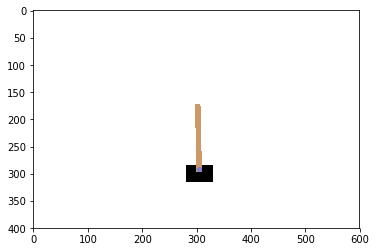

In [3]:
import gym

env = gym.make("CartPole-v0")
env.reset()

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
print('observation space:', env.observation_space)
print('action space:', env.action_space)
print('  - low:', env.observation_space.low)
print('  - high:', env.observation_space.high)
print("taking action")
new_obs, reward, is_done, _ = env.step(1)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

#All the paramters for controlling and monitoring the car

In [4]:
total_states = env.observation_space.shape[0]
total_actions = env.action_space.n

In [5]:
from keras_utils import reset_tf_session
s = reset_tf_session

In [6]:
#Initialize Neural Network for Our Agent
model = Sequential()
model.add(Dense(16, activation = 'relu' , input_shape = (total_states,)))
model.add(Dense(total_actions, activation = 'tanh'))

In [6]:
model.summary()    #Sumamry of our Neural Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Taking Initial Mean and Variance
mean = [np.zeros(w.shape) for w in model.get_weights()]
std = [np.ones(w.shape) for w in model.get_weights()]

n_samples = 20   #Taking 20 samples from gaussian distribution

In [8]:
#Drawing Random Samples of Weight from the mean and std deviation
weights = [
            np.add(np.array(mean) , std*np.array([np.random.randn(*w.shape) for w in model.get_weights()])) 
            for i in range(n_samples)
]

In [12]:
#Function to Evaluate the Weights to Take Action
def evaluate(env , weights , model , episodes = 100):
    plt.gca().clear()
    
    total_reward = 0
    state = env.reset()
    s = reset_tf_session
    model.set_weights(weights)      #Setting sampled weights
    for i in range(episodes):            
        state = state.reshape((1, total_states))
        action = model.predict_classes(state)     #Predicting Action
        obs , reward , is_done , info = env.step(action[0])
        
        plt.imshow(env.render('rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        total_reward += reward
        state = obs          #Chaning the state to the new obtained observation
        if is_done == True:
            break
    return total_reward
        

In [13]:
#Function to find the Standard Deviation
def find_std(elite_weights):
    std = [np.zeros(w.shape) for w in model.get_weights()]
    n = len(elite_weights)
    for i in range(6):
        std += ((elite_weights[i] - mean)**2)/(n-1)
    return std


### Tranning Loop

In [ ]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)
elite_size = 6
for t in range(500):          #Running for 500 iterations
    weights = [
            np.add(np.array(mean) , std*np.array([np.random.randn(*w.shape) for w in model.get_weights()])) 
            for i in range(n_samples)
                ]
    rewards = [evaluate(env , weight , model) for weight in weights]   #
    elite_set = sorted(rewards, reverse = True)[0:elite_size]
    elite_weights = [weights[rewards.index(elite_set[i])] for i in range(elite_size)]
    mean = np.array(elite_weights).mean(axis=0)
    std = find_std(elite_weights)

display.clear_output(wait=True)
return mean
    
    

1/1 [==============================] - 0s
